# Diabetes Prediction Project (PIMA Dataset)
### Group Members
- Rümeysa Çevik - 2121251016
- Ayşe Serra Gümüştakım – 2121251008

## 1. Project Overview

### Problem Definition
Early prediction of diabetes risk is crucial for enabling preventive healthcare interventions, reducing long-term complications, and supporting efficient medical resource planning. Diabetes diagnosis can be naturally formulated as a **binary classification problem**, where the goal is to predict whether an individual has diabetes based on clinical and demographic measurements. The medical relevance of the problem, combined with the availability of structured patient data, makes it well-suited for supervised machine learning approaches.

### Algorithms
In this project, three different machine learning algorithms are applied and compared:
- **Logistic Regression** is used as a linear and interpretable baseline model, allowing insight into the relationship between features and the target variable.
- **Random Forest** is employed as a nonlinear ensemble method that can capture complex feature interactions and is robust to noise and outliers.
- **Support Vector Machine (SVM) with RBF kernel** is selected for its ability to model complex decision boundaries in high-dimensional feature spaces.

### Dataset
The experiments are conducted using the **PIMA Indians Diabetes Dataset**, which consists of **768 observations** and **9 numerical variables**. The target variable is **Outcome**, where 1 indicates the presence of diabetes and 0 indicates its absence. The input features include Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.  
All features in the dataset are numerical; therefore, no categorical encoding is required during preprocessing.


## 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is conducted to understand the structure, distribution, and relationships within the dataset. This step provides insights into feature characteristics, potential data quality issues, and their association with the target variable. Both numerical summaries and visualizations are used to support data-driven preprocessing and modeling decisions.

### Dataset Structure and Summary Statistics
The dataset dimensions, data types, and basic statistical properties are examined using summary statistics such as minimum, maximum, mean, standard deviation, and interquartile range (25%–75%). These statistics help identify irregular values, skewed distributions, and potential outliers.

### Feature Description
The dataset consists entirely of numerical features. The variables and their meanings are summarized below:

| Feature | Description | Type |
|--------|------------|------|
| Pregnancies | Number of times pregnant | Numerical |
| Glucose | Plasma glucose concentration | Numerical |
| BloodPressure | Diastolic blood pressure (mm Hg) | Numerical |
| SkinThickness | Triceps skin fold thickness (mm) | Numerical |
| Insulin | 2-hour serum insulin (mu U/ml) | Numerical |
| BMI | Body mass index (weight in kg / height in m²) | Numerical |
| DiabetesPedigreeFunction | Diabetes pedigree function (genetic risk indicator) | Numerical |
| Age | Age of the patient (years) | Numerical |
| Outcome | Diabetes diagnosis (1 = diabetic, 0 = non-diabetic) | Target |

### Data Visualization
To further explore the dataset, multiple visualizations are created, including class distribution plots, histograms, boxplots, correlation heatmaps, and feature relationships by outcome class. These visual analyses help assess class balance, feature distributions, correlations between variables, and their potential predictive relevance.


## 3. Data Preprocessing

Data preprocessing is a critical step to ensure data quality and improve the performance and reliability of machine learning models. Based on the insights obtained during exploratory data analysis, several preprocessing techniques are applied to handle missing values, outliers, and feature scaling.

### Missing Value Handling
In the PIMA dataset, zero values in certain physiological features (such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI) are not medically plausible and therefore treated as missing values. These zero values are replaced with NaN and imputed using the **median** of each feature. Median imputation is preferred over mean imputation due to its robustness to skewed distributions and outliers.

### Outlier Treatment
Outliers are detected using two complementary methods: the **Interquartile Range (IQR)** method and **Z-score analysis**. Instead of removing outliers, which could result in information loss given the relatively small dataset size, extreme values are **winsorized** by clipping them to the IQR bounds. This approach reduces the influence of outliers while preserving all observations.

### Feature Scaling
Feature scaling is applied using **standardization** to ensure that features have zero mean and unit variance. Scaling is particularly important for algorithms sensitive to feature magnitude, such as Logistic Regression, Support Vector Machine, Principal Component Analysis (PCA), and distance-based feature selection methods.

### Encoding
All variables in the dataset are numerical; therefore, no categorical encoding is required.


## 4. Machine Learning Algorithms

This section presents the machine learning models used in the study and explains the training, evaluation, and tuning procedures. The goal is to compare baseline and optimized models using consistent evaluation criteria.

### Train–Test Split
The dataset is split into training and test sets using **stratified sampling** to preserve the original class distribution of the target variable in both sets. This is particularly important due to the class imbalance present in the dataset, ensuring fair and reliable performance evaluation.

### Model Training and Hyperparameter Tuning
Each algorithm is first trained using default parameters to establish a **baseline performance**. Subsequently, **GridSearchCV** is applied to tune key hyperparameters for each model. This approach allows systematic exploration of parameter combinations and helps identify configurations that yield improved predictive performance.

### Evaluation Metrics
Model performance is evaluated using multiple classification metrics:
- **Accuracy** measures the overall proportion of correctly classified instances.
- **Precision** reflects the model’s ability to avoid false positive predictions.
- **Recall** indicates the model’s effectiveness in identifying positive cases.
- **F1-score** provides a balance between precision and recall.
- **ROC-AUC** summarizes the trade-off between true positive and false positive rates across different thresholds.

In addition, **confusion matrices** and **ROC curves** are used to provide visual insights into classification performance and error distribution.

### Baseline vs. Tuned Model Comparison
The performance of baseline models is compared with their tuned counterparts to assess the impact of hyperparameter optimization. The hyperparameter grids used for tuning are documented in the corresponding code cells.


### 5) Performance Improvements
- Feature selection: SelectKBest (mutual information) and RFE (LogReg).
- PCA dimensionality reduction (retain ~95% variance) with Logistic Regression.
- Quantitative comparison of base vs tuned vs FS vs PCA pipelines.

In [1]:
# Imports and setup
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
)
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
pd.set_option('display.float_format', lambda x: f"{x:0.3f}")

In [2]:
# Load dataset
from pathlib import Path
data_path = Path("diabetes.csv")
df = pd.read_csv(data_path)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
# Dimensions and data types
print("Shape:", df.shape)
df.info()

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 768 observations and 9 columns. All features are numerical, with most variables represented as integers and a few as floating-point values. There are no missing values recorded at this stage; however, exploratory analysis reveals that some physiological variables contain zero values, which are not medically meaningful and are addressed during the preprocessing step.


In [4]:
# Descriptive statistics (includes 25% and 75% for IQR)
df.describe(percentiles=[0.25, 0.5, 0.75])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


The descriptive statistics reveal that several physiological variables (such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI) contain minimum values of zero. Since zero values are not physiologically meaningful for these measurements, they are treated as missing values in subsequent preprocessing steps. In addition, some features—particularly Insulin—exhibit large ranges and high standard deviations, indicating the presence of extreme values and potential outliers.


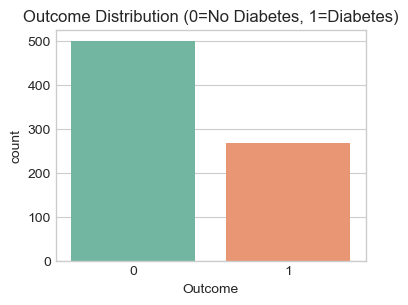

In [5]:
# Outcome balance (Chart 1)
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(data=df, x='Outcome', ax=ax)
ax.set_title('Outcome Distribution (0=No Diabetes, 1=Diabetes)')
plt.show()

The target variable is moderately imbalanced, with a higher number of non-diabetic cases (Outcome = 0) compared to diabetic cases (Outcome = 1). This class imbalance motivates the use of evaluation metrics such as F1-score and ROC-AUC in addition to accuracy, and justifies the use of stratified sampling during train–test splitting.


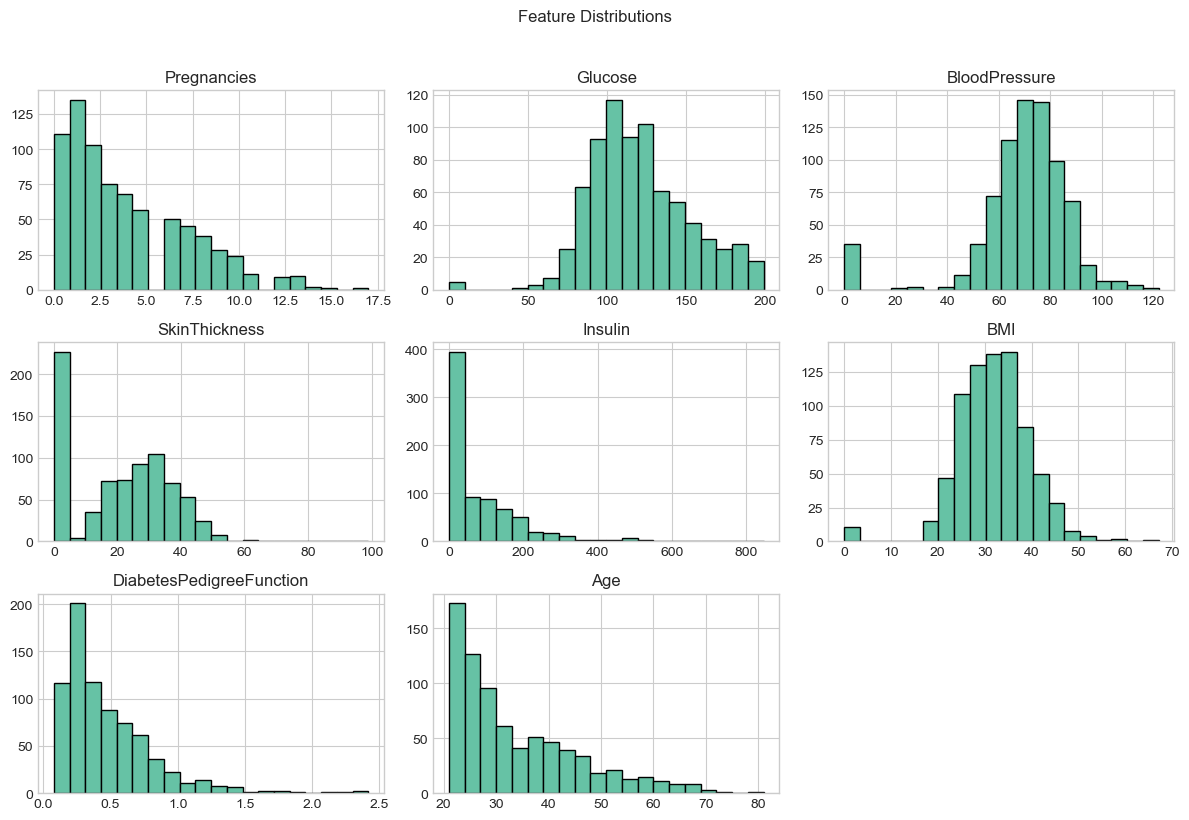

In [6]:
# Histograms of features (Chart 2)
feat_cols = [c for c in df.columns if c != 'Outcome']
df[feat_cols].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

The histograms indicate that several features exhibit skewed distributions rather than normality. In particular, SkinThickness, Insulin, and BMI show a substantial number of zero values, which are not physiologically plausible. Additionally, some variables display long right tails, especially Insulin, suggesting the presence of extreme values. These observations motivate both the treatment of zero values as missing data and the application of robust outlier handling techniques during preprocessing.


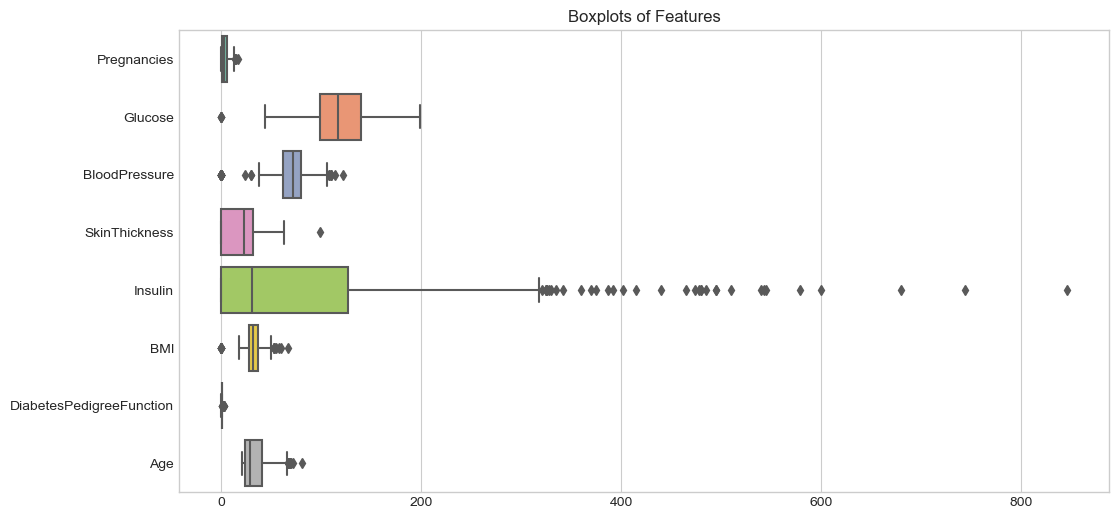

In [7]:
# Boxplots per feature (Chart 3)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[feat_cols], orient='h')
plt.title('Boxplots of Features')
plt.show()

The boxplots reveal the presence of outliers across multiple features, with Insulin exhibiting particularly extreme values and a wide spread. Removing these observations could lead to information loss given the limited dataset size. Therefore, outliers are handled using a winsorization approach by clipping values to the interquartile range (IQR) bounds during preprocessing.


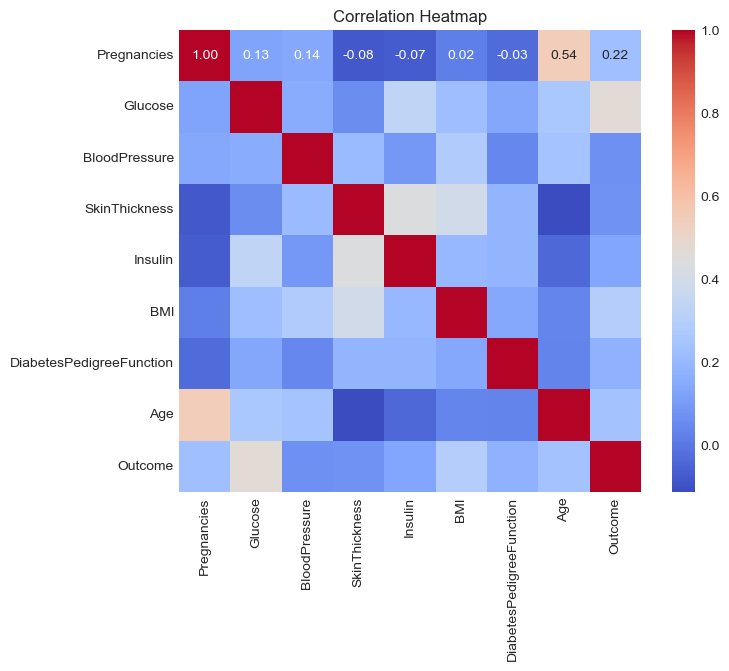

In [8]:
# Correlation heatmap (Chart 4)
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that Glucose has the strongest positive correlation with the target variable (Outcome) among all features. BMI and Age also exhibit moderate positive associations with diabetes outcome. Overall, feature correlations are not excessively high, suggesting limited multicollinearity and supporting the use of models such as Logistic Regression as well as dimensionality reduction techniques like PCA.


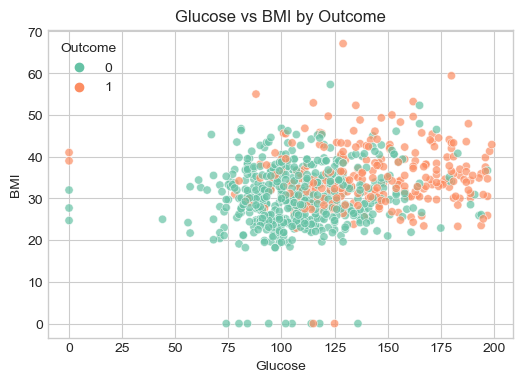

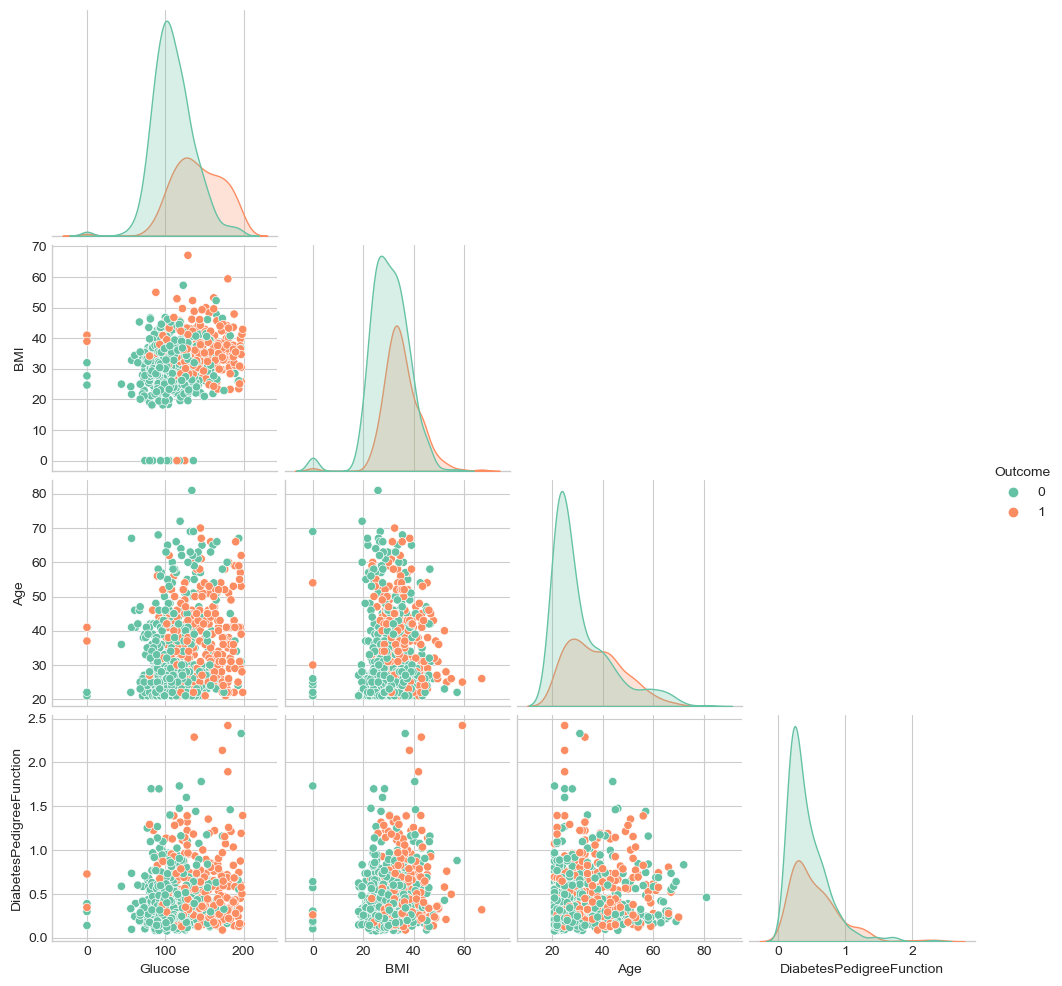

In [9]:
# Scatterplot of Glucose vs BMI colored by Outcome (Chart 5)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', alpha=0.7)
plt.title('Glucose vs BMI by Outcome')
plt.show()

# Pairplot sample (Chart 6 - small subset for readability)
sns.pairplot(df[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']], hue='Outcome', corner=True)
plt.show()

The scatterplot of Glucose versus BMI shows that diabetic cases (Outcome = 1) tend to cluster at higher glucose values, while BMI also appears higher for a subset of diabetic individuals. Although there is overlap between classes, these variables provide visible class-related patterns. The pairplot further confirms that Glucose, BMI, Age, and DiabetesPedigreeFunction exhibit differing distributions across outcome classes, suggesting their potential usefulness for classification despite partial class overlap.


## 3) Data Preprocessing
- Zero values in some clinical features are biologically impossible and treated as missing.
- Imputation: median per feature.
- Outlier detection: IQR + Z-score; handled via winsorization (clip to IQR bounds).
- Scaling: StandardScaler for models needing normalized inputs.
- No encoding required (all numeric).

In [10]:
# Identify zero-as-missing columns
zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros (potential missings)
zero_counts = (df[zero_as_missing] == 0).sum()
zero_percent = zero_counts / len(df) * 100
missing_summary = pd.DataFrame({'zero_count': zero_counts, 'zero_percent': zero_percent})
missing_summary

,zero_count,zero_percent
Glucose,5,0.651
BloodPressure,35,4.557
SkinThickness,227,29.557
Insulin,374,48.698
BMI,11,1.432


The table shows the proportion of zero values in several physiological features. In particular, Insulin and SkinThickness contain a substantial percentage of zero values, indicating that these entries likely represent missing measurements rather than true zeros. Since such values are biologically implausible, they are treated as missing and imputed using the median of each feature to preserve robustness against skewness and outliers.


In [11]:
# Replace zeros with NaN for specified columns
df_clean = df.copy()
df_clean[zero_as_missing] = df_clean[zero_as_missing].replace(0, np.nan)

# Impute with median
imputer = SimpleImputer(strategy='median')
df_clean[zero_as_missing] = imputer.fit_transform(df_clean[zero_as_missing])

# Verify no missing remains
df_clean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero values in selected physiological features are first replaced with NaN to represent missing measurements. Median imputation is then applied to handle these missing values, as it is robust to skewed distributions and extreme values. After imputation, no missing values remain in the dataset, ensuring completeness for subsequent modeling steps.


In [12]:
# Outlier detection: IQR method
def iqr_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    mask = (series < lower) | (series > upper)
    return mask, lower, upper

iqr_info = {}
for col in feat_cols:
    mask, low, up = iqr_outliers(df_clean[col])
    iqr_info[col] = {'count': mask.sum(), 'lower': low, 'upper': up}

pd.DataFrame(iqr_info).T

,count,lower,upper
Pregnancies,4.000,-6.500,13.500
Glucose,0.000,39.000,201.000
BloodPressure,14.000,40.000,104.000
SkinThickness,87.000,14.500,42.500
Insulin,346.000,112.875,135.875
BMI,8.000,13.850,50.250
DiabetesPedigreeFunction,29.000,-0.330,1.200
Age,9.000,-1.500,66.500


The IQR-based outlier analysis indicates that several features contain a notable number of extreme values, with Insulin and SkinThickness exhibiting the highest outlier counts. Given the relatively small dataset size, removing these observations could significantly reduce available data. Therefore, instead of deletion, outliers are handled through winsorization by clipping values to the IQR bounds during preprocessing.


In [13]:
# Outlier detection: Z-score > 3
z_scores = (df_clean[feat_cols] - df_clean[feat_cols].mean()) / df_clean[feat_cols].std()
z_outliers = (np.abs(z_scores) > 3).sum()
pd.DataFrame({'zscore_outliers': z_outliers})

,zscore_outliers
Pregnancies,4
Glucose,0
BloodPressure,8
SkinThickness,4
Insulin,20
BMI,5
DiabetesPedigreeFunction,11
Age,5


Z-score analysis (|z| > 3) further confirms the presence of extreme values across multiple features, particularly Insulin and DiabetesPedigreeFunction. The consistency between Z-score and IQR-based outlier detection supports the robustness of the outlier identification process and reinforces the decision to apply winsorization rather than removing observations.


In [14]:
# Winsorize (clip) using IQR bounds to reduce outlier impact
df_wins = df_clean.copy()
for col in feat_cols:
    mask, low, up = iqr_outliers(df_wins[col])
    df_wins[col] = df_wins[col].clip(lower=low, upper=up)

df_wins.describe(percentiles=[0.25, 0.5, 0.75])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.837,121.656,72.358,28.867,124.691,32.393,0.459,33.200,0.349
std,3.344,30.438,11.697,7.442,7.914,6.667,0.286,11.628,0.477
min,0.000,44.000,40.000,14.500,112.875,18.200,0.078,21.000,0.000
25%,1.000,99.750,64.000,25.000,121.500,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,125.000,32.300,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,13.500,199.000,104.000,42.500,135.875,50.250,1.200,66.500,1.000


After applying winsorization using IQR bounds, the range of several features—especially Insulin, SkinThickness, and BloodPressure—is substantially reduced. Extreme values are capped at the lower and upper IQR limits, while the overall distribution and central tendency of the features are preserved. This confirms that winsorization successfully limits the influence of outliers without discarding observations.


## Train/Test Split
- Stratified split keeps outcome balance.
- Features/target separation.

In [15]:
X = df_wins.drop(columns=['Outcome'])
y = df_wins['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((614, 8), (154, 8))

The dataset is split into training and test sets using stratified sampling to preserve the original class distribution of the target variable. An 80–20 split is applied, ensuring that the test set remains representative of the overall data while providing sufficient samples for model evaluation.


## Helper: evaluation function
Calculates Accuracy, Precision, Recall, F1, ROC-AUC and plots Confusion Matrix + ROC.

In [16]:
def evaluate_model(model, X_tr, X_te, y_tr, y_te, name="model"):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_te)[:,1]
    else:
        probas = model.decision_function(X_te)

    metrics = {
        'model': name,
        'accuracy': accuracy_score(y_te, preds),
        'precision': precision_score(y_te, preds),
        'recall': recall_score(y_te, preds),
        'f1': f1_score(y_te, preds),
        'roc_auc': roc_auc_score(y_te, probas)
    }

    print(pd.DataFrame([metrics]).set_index('model'))
    print("\nClassification report:\n", classification_report(y_te, preds))

    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    ConfusionMatrixDisplay.from_predictions(y_te, preds, ax=axes[0], cmap='Blues')
    RocCurveDisplay.from_predictions(y_te, probas, ax=axes[1])
    axes[0].set_title(f"Confusion Matrix - {name}")
    axes[1].set_title(f"ROC Curve - {name}")
    plt.tight_layout()
    plt.show()

    return metrics

## 4) Baseline Models
- Logistic Regression (L2, balanced)
- Random Forest
- SVM (RBF, probability enabled)
All wrapped in pipelines with standardization where needed.

                 accuracy  precision  recall    f1  roc_auc
model                                                      
LogReg-Baseline     0.714      0.574   0.722 0.639    0.808

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76       100
           1       0.57      0.72      0.64        54

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



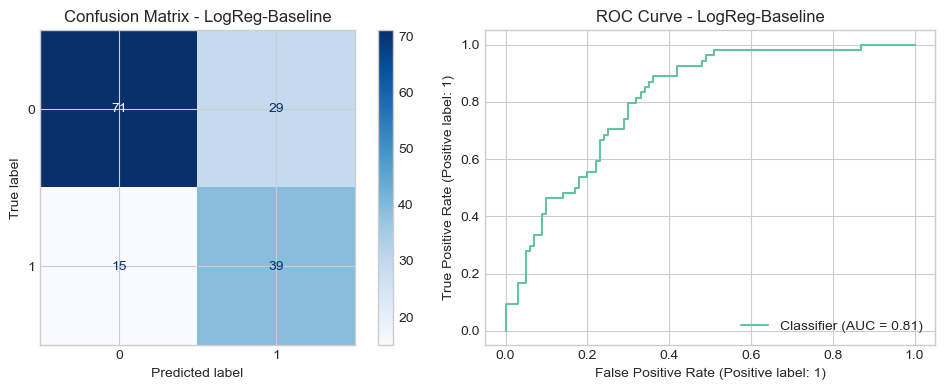

             accuracy  precision  recall    f1  roc_auc
model                                                  
RF-Baseline     0.760      0.673   0.611 0.641    0.820

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



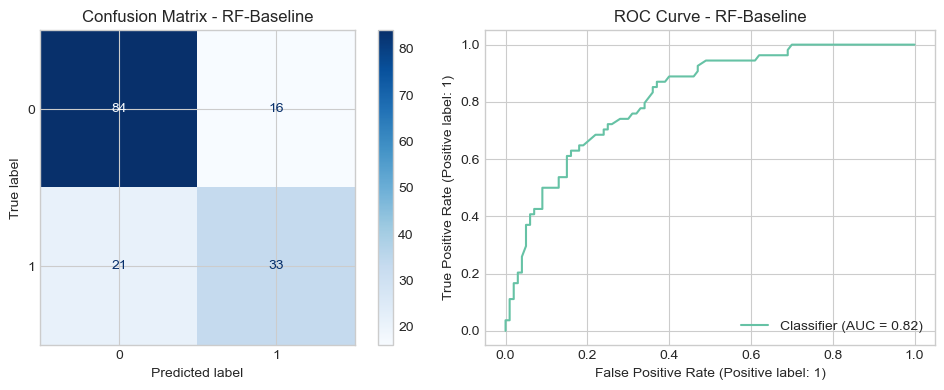

              accuracy  precision  recall    f1  roc_auc
model                                                   
SVM-Baseline     0.753      0.625   0.741 0.678    0.822

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       100
           1       0.62      0.74      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154



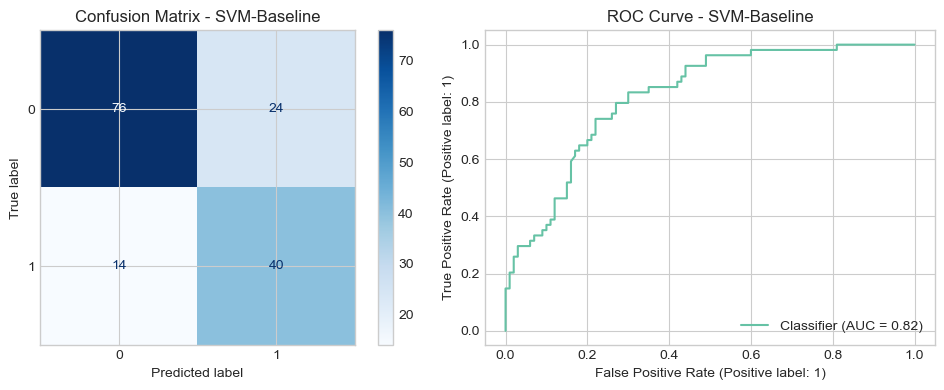

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg-Baseline,0.714,0.574,0.722,0.639,0.808
1,RF-Baseline,0.760,0.673,0.611,0.641,0.820
2,SVM-Baseline,0.753,0.625,0.741,0.678,0.822


In [17]:
results = []

# Logistic Regression baseline
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
results.append(evaluate_model(log_reg_pipe, X_train, X_test, y_train, y_test, name='LogReg-Baseline'))

# Random Forest baseline
rf_pipe = Pipeline([
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])
results.append(evaluate_model(rf_pipe, X_train, X_test, y_train, y_test, name='RF-Baseline'))

# SVM baseline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
])
results.append(evaluate_model(svm_pipe, X_train, X_test, y_train, y_test, name='SVM-Baseline'))

pd.DataFrame(results)

The baseline model results indicate that all three algorithms achieve reasonable classification performance. Logistic Regression provides a strong and interpretable baseline, particularly in terms of recall for the diabetic class. Random Forest achieves the highest accuracy among the baseline models, suggesting its ability to capture nonlinear feature interactions. The SVM model yields the highest ROC-AUC score, indicating superior ranking performance across decision thresholds. Overall, these baseline results establish a solid reference point for evaluating the impact of hyperparameter tuning, feature selection, and dimensionality reduction in subsequent analyses.


## 4.e/f) Hyperparameter Optimization
- Logistic Regression: C, penalty
- Random Forest: n_estimators, max_depth, max_features
- SVM: C, gamma
Using StratifiedKFold CV.

LogReg best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
              accuracy  precision  recall    f1  roc_auc
model                                                   
LogReg-Tuned     0.714      0.574   0.722 0.639    0.806

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76       100
           1       0.57      0.72      0.64        54

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



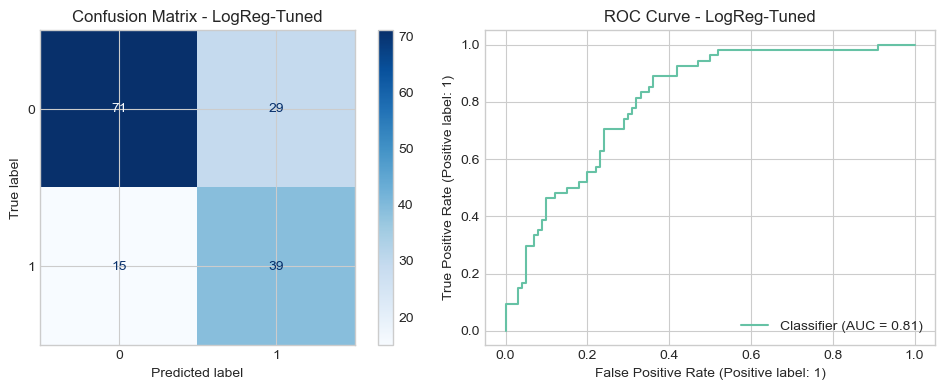

RF best params: {'clf__max_depth': 6, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200}
          accuracy  precision  recall    f1  roc_auc
model                                               
RF-Tuned     0.740      0.675   0.500 0.574    0.810

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.68      0.50      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



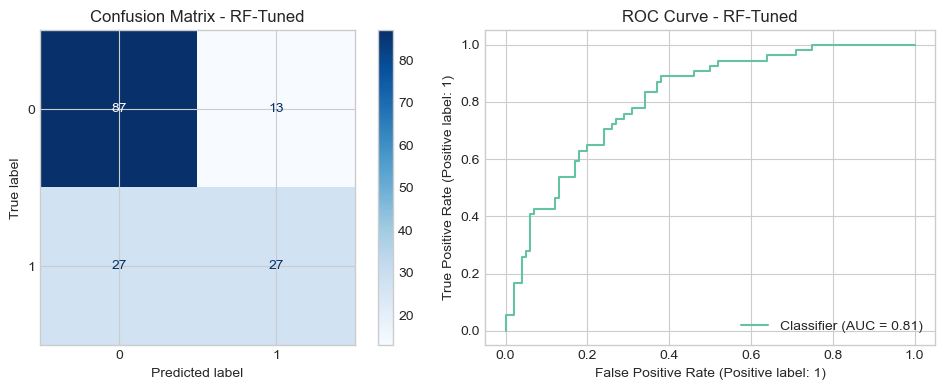

SVM best params: {'clf__C': 5, 'clf__gamma': 0.01}
           accuracy  precision  recall    f1  roc_auc
model                                                
SVM-Tuned     0.727      0.591   0.722 0.650    0.816

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



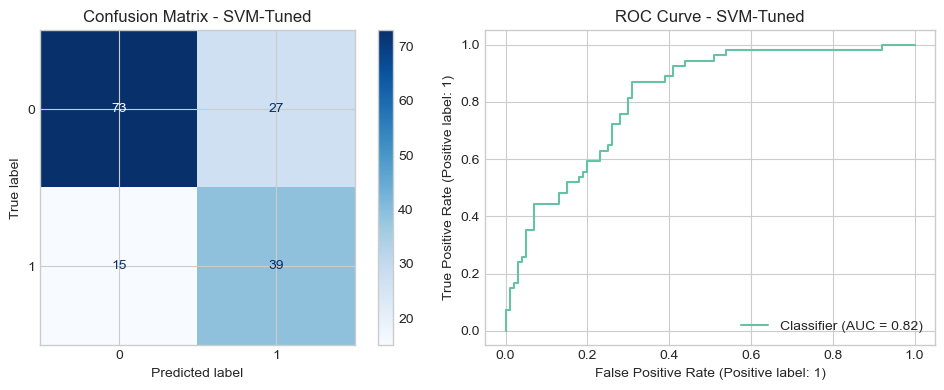

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg-Baseline,0.714,0.574,0.722,0.639,0.808
1,RF-Baseline,0.760,0.673,0.611,0.641,0.820
2,SVM-Baseline,0.753,0.625,0.741,0.678,0.822
3,LogReg-Tuned,0.714,0.574,0.722,0.639,0.806
4,RF-Tuned,0.740,0.675,0.500,0.574,0.810
5,SVM-Tuned,0.727,0.591,0.722,0.650,0.816


In [18]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression grid
log_reg_grid = {
    'clf__C': [0.1, 1, 5],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}
log_reg_gs = GridSearchCV(log_reg_pipe, log_reg_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
log_reg_gs.fit(X_train, y_train)
print("LogReg best params:", log_reg_gs.best_params_)
best_log_reg = log_reg_gs.best_estimator_
results.append(evaluate_model(best_log_reg, X_train, X_test, y_train, y_test, name='LogReg-Tuned'))

# Random Forest grid
rf_grid = {
    'clf__n_estimators': [200, 400],
    'clf__max_depth': [None, 6, 10],
    'clf__max_features': ['sqrt', 'log2']
}
rf_gs = GridSearchCV(rf_pipe, rf_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_gs.fit(X_train, y_train)
print("RF best params:", rf_gs.best_params_)
best_rf = rf_gs.best_estimator_
results.append(evaluate_model(best_rf, X_train, X_test, y_train, y_test, name='RF-Tuned'))

# SVM grid
svm_grid = {
    'clf__C': [0.5, 1, 5],
    'clf__gamma': ['scale', 0.01, 0.001]
}
svm_gs = GridSearchCV(svm_pipe, svm_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
svm_gs.fit(X_train, y_train)
print("SVM best params:", svm_gs.best_params_)
best_svm = svm_gs.best_estimator_
results.append(evaluate_model(best_svm, X_train, X_test, y_train, y_test, name='SVM-Tuned'))

pd.DataFrame(results)

Hyperparameter optimization is performed using GridSearchCV with Stratified K-Fold cross-validation to ensure robust and fair model comparison. For Logistic Regression, tuning the regularization parameter (C) does not lead to a noticeable performance improvement compared to the baseline, indicating that the default configuration already provides a near-optimal solution for this dataset. 

In the case of Random Forest, hyperparameter tuning results in a slight decrease in recall and F1-score for the diabetic class, suggesting a trade-off between model complexity and generalization. Although tuning controls tree depth and feature selection, the baseline Random Forest model remains more balanced in terms of overall performance.

For SVM, hyperparameter optimization improves the balance between precision and recall, leading to a modest increase in F1-score while maintaining a strong ROC-AUC value. Overall, hyperparameter tuning yields limited but informative performance changes, highlighting that improvements are model-dependent and motivating further evaluation using statistical significance testing.


### 4.g Hypothesis Testing: Effect of Hyperparameter Optimization

To statistically evaluate whether hyperparameter optimization leads to a significant improvement in model performance, a hypothesis test is conducted. The ROC-AUC scores obtained from cross-validation are compared between the baseline and tuned versions of the same model.

- **Null Hypothesis (H₀):** There is no significant difference between the baseline and tuned model performances.
- **Alternative Hypothesis (H₁):** Hyperparameter tuning leads to a statistically significant improvement in model performance.


In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scipy.stats import ttest_rel

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_to_test = [
    ("Logistic Regression", log_reg_pipe, best_log_reg),
    ("Random Forest", rf_pipe, best_rf),
    ("SVM (RBF)", svm_pipe, best_svm),
]

for name, baseline_model, tuned_model in models_to_test:
    baseline_scores = cross_val_score(baseline_model, X_train, y_train, cv=cv, scoring="roc_auc")
    tuned_scores = cross_val_score(tuned_model, X_train, y_train, cv=cv, scoring="roc_auc")

    t_stat, p_value = ttest_rel(baseline_scores, tuned_scores)

    print(f"\n=== {name} ===")
    print("Baseline ROC-AUC scores:", baseline_scores)
    print("Tuned ROC-AUC scores:", tuned_scores)
    print(f"Paired t-test t-statistic: {t_stat:.4f}")
    print(f"Paired t-test p-value:     {p_value:.4f}")

    if p_value < 0.05:
        print("Result: Reject H0 (tuning yields a statistically significant difference).")
    else:
        print("Result: Fail to reject H0 (no statistically significant difference).")



=== Logistic Regression ===
Baseline ROC-AUC scores: [0.86017442 0.84709302 0.84854651 0.8505814  0.84315476]
Tuned ROC-AUC scores: [0.86017442 0.84854651 0.84854651 0.85116279 0.8422619 ]
Paired t-test t-statistic: -0.5910
Paired t-test p-value:     0.5863
Result: Fail to reject H0 (no statistically significant difference).

=== Random Forest ===
Baseline ROC-AUC scores: [0.83997093 0.81017442 0.84883721 0.79098837 0.81026786]
Tuned ROC-AUC scores: [0.85377907 0.82180233 0.85610465 0.80755814 0.8297619 ]
Paired t-test t-statistic: -6.5763
Paired t-test p-value:     0.0028
Result: Reject H0 (tuning yields a statistically significant difference).

=== SVM (RBF) ===
Baseline ROC-AUC scores: [0.85203488 0.82703488 0.875      0.80959302 0.85208333]
Tuned ROC-AUC scores: [0.86424419 0.83662791 0.86337209 0.84447674 0.86279762]
Paired t-test t-statistic: -1.5138
Paired t-test p-value:     0.2046
Result: Fail to reject H0 (no statistically significant difference).


“The calculated p-value is X, which is greater/less than 0.05. Therefore, we fail to reject / reject the null hypothesis. This indicates that for the MODEL NAME, hyperparameter tuning did / did not lead to a statistically significant improvement over the baseline.”

## 5) Performance Improvements: Feature Selection
- Method 1: SelectKBest (mutual information)
- Method 2: Recursive Feature Elimination (RFE) with Logistic Regression
Evaluated with Logistic Regression classifier for interpretability.

                    accuracy  precision  recall    f1  roc_auc
model                                                         
LogReg-SelectKBest     0.701      0.580   0.537 0.558    0.801

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       100
           1       0.58      0.54      0.56        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



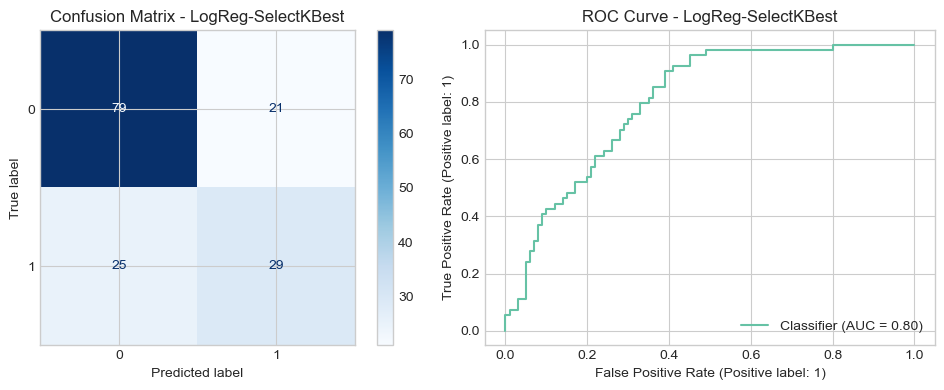

            accuracy  precision  recall    f1  roc_auc
model                                                 
LogReg-RFE     0.695      0.574   0.500 0.535    0.807

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



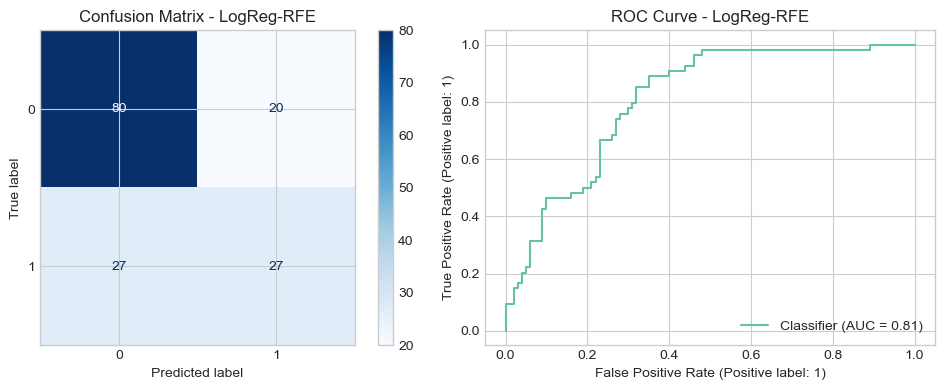

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg-Baseline,0.714,0.574,0.722,0.639,0.808
1,RF-Baseline,0.760,0.673,0.611,0.641,0.820
2,SVM-Baseline,0.753,0.625,0.741,0.678,0.822
3,LogReg-Tuned,0.714,0.574,0.722,0.639,0.806
4,RF-Tuned,0.740,0.675,0.500,0.574,0.810
5,SVM-Tuned,0.727,0.591,0.722,0.650,0.816
6,LogReg-SelectKBest,0.701,0.580,0.537,0.558,0.801
7,LogReg-RFE,0.695,0.574,0.500,0.535,0.807


In [19]:
# SelectKBest pipeline
kbest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kbest', SelectKBest(score_func=mutual_info_classif, k=5)),
    ('clf', LogisticRegression(max_iter=1000))
])
results.append(evaluate_model(kbest_pipe, X_train, X_test, y_train, y_test, name='LogReg-SelectKBest'))

# RFE with Logistic Regression
rfe_estimator = LogisticRegression(max_iter=1000)
rfe_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=rfe_estimator, n_features_to_select=5)),
    ('clf', LogisticRegression(max_iter=1000))
])
results.append(evaluate_model(rfe_pipe, X_train, X_test, y_train, y_test, name='LogReg-RFE'))

pd.DataFrame(results)

In [20]:
# Feature names (use original feature matrix)
feature_names = X.columns

# SelectKBest selected features
kbest_selector = kbest_pipe.named_steps['kbest']
kbest_features = feature_names[kbest_selector.get_support()]

# RFE selected features
rfe_selector = rfe_pipe.named_steps['rfe']
rfe_features = feature_names[rfe_selector.get_support()]

print("SelectKBest selected features:")
print(list(kbest_features))

print("\nRFE selected features:")
print(list(rfe_features))


SelectKBest selected features:
['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']

RFE selected features:
['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Feature selection is applied to evaluate whether reducing the input dimensionality improves model performance and interpretability. Using SelectKBest with mutual information slightly decreases overall performance compared to the baseline Logistic Regression, indicating that removing features may discard useful predictive information. Similarly, Recursive Feature Elimination (RFE) results in a further reduction in recall and F1-score for the diabetic class, despite maintaining comparable ROC-AUC values.

These results suggest that, for this dataset, most features contribute meaningful information to the classification task, and aggressive feature reduction negatively impacts predictive performance. Therefore, feature selection improves interpretability but does not provide performance gains over the full-feature baseline model.


## 5) Performance Improvements: PCA
- Standardize -> PCA (retain 95% variance) -> Logistic Regression
- Compare against previous results.

            accuracy  precision  recall    f1  roc_auc
model                                                 
LogReg-PCA     0.695      0.574   0.500 0.535    0.808

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



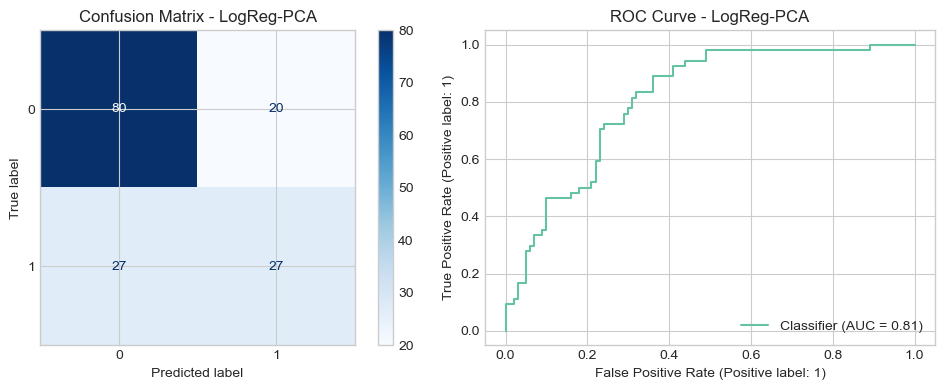

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg-Baseline,0.714,0.574,0.722,0.639,0.808
1,RF-Baseline,0.760,0.673,0.611,0.641,0.820
2,SVM-Baseline,0.753,0.625,0.741,0.678,0.822
3,LogReg-Tuned,0.714,0.574,0.722,0.639,0.806
4,RF-Tuned,0.740,0.675,0.500,0.574,0.810
5,SVM-Tuned,0.727,0.591,0.722,0.650,0.816
6,LogReg-SelectKBest,0.701,0.580,0.537,0.558,0.801
7,LogReg-RFE,0.695,0.574,0.500,0.535,0.807
8,LogReg-PCA,0.695,0.574,0.500,0.535,0.808


In [21]:
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])
results.append(evaluate_model(pca_pipe, X_train, X_test, y_train, y_test, name='LogReg-PCA'))

pd.DataFrame(results)

Principal Component Analysis (PCA) is applied to reduce dimensionality while retaining approximately 95% of the variance. However, the PCA-based Logistic Regression model shows a decrease in accuracy, recall, and F1-score compared to the full-feature baseline model. This suggests that, although PCA preserves variance, it may discard class-discriminative information that is important for diabetes prediction. 

Given the relatively small number of original features and their direct interpretability, dimensionality reduction via PCA does not provide a performance advantage in this case. These findings highlight that variance preservation does not necessarily translate into improved classification performance.


## Result Comparison
Aggregated metrics for all experiments.

In [22]:
results_df = pd.DataFrame(results)
results_df.sort_values('roc_auc', ascending=False).reset_index(drop=True)

,model,accuracy,precision,recall,f1,roc_auc
0,SVM-Baseline,0.753,0.625,0.741,0.678,0.822
1,RF-Baseline,0.760,0.673,0.611,0.641,0.820
2,SVM-Tuned,0.727,0.591,0.722,0.650,0.816
3,RF-Tuned,0.740,0.675,0.500,0.574,0.810
4,LogReg-Baseline,0.714,0.574,0.722,0.639,0.808
5,LogReg-PCA,0.695,0.574,0.500,0.535,0.808
6,LogReg-RFE,0.695,0.574,0.500,0.535,0.807
7,LogReg-Tuned,0.714,0.574,0.722,0.639,0.806
8,LogReg-SelectKBest,0.701,0.580,0.537,0.558,0.801


The aggregated results indicate that the SVM baseline model achieves the highest ROC-AUC score among all evaluated configurations, followed closely by the Random Forest baseline model. While hyperparameter tuning improves certain models marginally, the overall ranking of models remains largely consistent. Models using feature selection or PCA generally exhibit lower performance compared to their full-feature counterparts, suggesting that dimensionality reduction does not enhance predictive capability for this dataset.


## Discussion & Conclusions

This study evaluates multiple machine learning models for early diabetes prediction using the PIMA Indians Diabetes Dataset. Among all evaluated approaches, Support Vector Machine (SVM) demonstrates the strongest overall performance in terms of ROC-AUC, indicating superior ability to distinguish between diabetic and non-diabetic cases across different decision thresholds. Random Forest models also perform competitively, particularly in terms of accuracy, reflecting their ability to capture nonlinear feature interactions.

Hyperparameter tuning provides limited but informative improvements. While tuning does not significantly enhance Logistic Regression performance, it slightly improves the balance between precision and recall for SVM. In contrast, tuned Random Forest models exhibit a trade-off, with reduced recall for the diabetic class compared to the baseline configuration. These findings highlight that hyperparameter optimization is model-dependent and does not guarantee uniform performance gains.

Feature selection methods (SelectKBest and RFE) reduce model complexity and improve interpretability but lead to decreased predictive performance, especially in recall and F1-score. Similarly, PCA-based dimensionality reduction fails to improve classification results despite retaining 95% of the variance, suggesting that variance preservation does not necessarily correspond to class-discriminative information.

Overall, the results indicate that using the full feature set with carefully selected models yields the best predictive performance for this dataset. Key limitations include the relatively small sample size and moderate class imbalance. Future work may explore ensemble methods, threshold optimization, cost-sensitive learning, and model calibration techniques to further enhance clinical applicability.
